In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image, ImageFilter

import tensorflow as tf 
from tensorflow import keras

In [6]:
FILE_NAME = "./Profile_Photo.jpg"

In [16]:
portrait = Image.open(FILE_NAME)

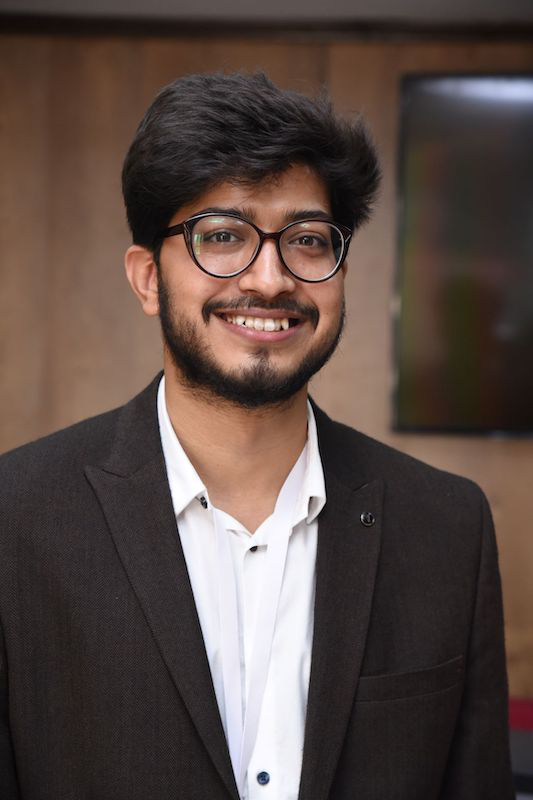

In [30]:
portrait

In [31]:
image.*?

In [118]:
data = np.array(portrait)
data = data.astype('float64')

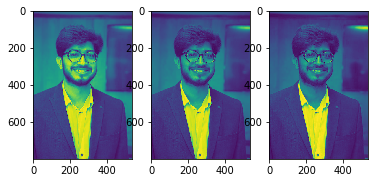

In [119]:
fig, ax = plt.subplots(1, 3)


for i in range(3):
    ax[i].imshow(data[:,:,i])
    


In [120]:
edge_kernel1 = np.array([[0 , 0 , -1], [0, 0 , 0], [-1, 0, 1]])
edge_kernel1

array([[ 0,  0, -1],
       [ 0,  0,  0],
       [-1,  0,  1]])

In [125]:
input_shape = data.shape
input_shape

(800, 533, 3)

In [128]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters= 8, 
                        strides = [1,1], 
                        kernel_size = 3,
                        input_shape=input_shape
                       ),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [130]:
model.compile(loss='mse', optimizer='SGD')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 798, 531, 8)       224       
_________________________________________________________________
flatten (Flatten)            (None, 3389904)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               433907840 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 433,908,193
Trainable params: 433,908,193
Non-trainable params: 0
_________________________________________________________________


In [139]:
labels = np.array([0])

In [132]:

data = tf.constant(data)
data

<tf.Tensor: id=156, shape=(800, 533, 3), dtype=float64, numpy=
array([[[61., 51., 50.],
        [61., 51., 50.],
        [61., 51., 50.],
        ...,
        [51., 50., 48.],
        [50., 49., 47.],
        [50., 49., 47.]],

       [[61., 51., 50.],
        [61., 51., 50.],
        [62., 52., 51.],
        ...,
        [51., 50., 48.],
        [50., 49., 47.],
        [50., 49., 47.]],

       [[62., 52., 51.],
        [62., 52., 51.],
        [62., 52., 51.],
        ...,
        [53., 49., 48.],
        [52., 48., 47.],
        [52., 48., 47.]],

       ...,

       [[17., 15., 16.],
        [17., 15., 16.],
        [17., 15., 16.],
        ...,
        [67., 66., 80.],
        [65., 64., 78.],
        [64., 63., 77.]],

       [[15., 13., 14.],
        [16., 14., 15.],
        [17., 15., 16.],
        ...,
        [73., 72., 86.],
        [72., 71., 85.],
        [72., 71., 85.]],

       [[15., 13., 14.],
        [16., 14., 15.],
        [18., 16., 17.],
        ...,
        [77

In [133]:
data = np.expand_dims(data, axis=0).shape

In [140]:

model.fit(data, labels)

ValueError: Failed to find data adapter that can handle input: (<class 'tuple'> containing values of types {"<class 'int'>"}), <class 'numpy.ndarray'>

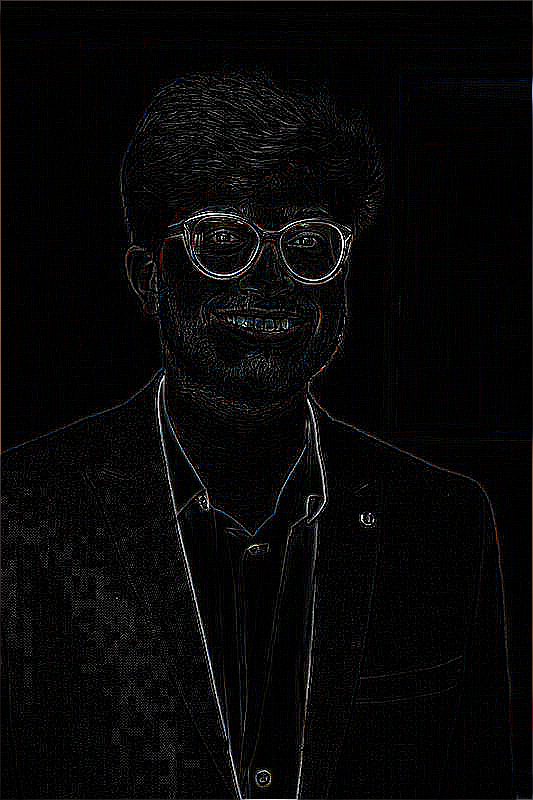

In [171]:
filtered = portrait.filter(ImageFilter.FIND_EDGES)
#filtered = filtered.filter(ImageFilter.SHARPEN)
filtered
#filtered.save("profile_photo_edge_filtered.jpg")

In [169]:
new = portrait + filtered

TypeError: unsupported operand type(s) for +: 'JpegImageFile' and 'Image'

In [166]:
filtered = portrait.filter(ImageFilter.Kernel((3,3), 
                                              (0, -1, 0,
                                               -1, 5 , -1,
                                               0, -1, 0),
                                              1, 0
                                             )
                          )
filtered
filtered.save("profile_photo_edge_filtered.jpg")